# Hypothesis 2: The higher the monthly average temperature in Corpus Christi, the greater the variability

**To test the hypothesis, we import the dataset with 30 years of daily temperature in Corpus Christi from the year 1994-2024.** <br> <hr>
 Dataset is a csv file containing the following fields: <br>
Year, Month, Day, min_temp(Celcius), max_temp(Celcius)

In [2]:
# Import Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Import dataset into a dataframe
temperature_data = pd.read_csv("cc_temperatures_data.csv", names=['year','month','day','tmin','tmax'])
# Convert year, month, and day columns to a datetime object
temperature_data['date'] = pd.to_datetime(temperature_data[['year', 'month', 'day']])
temperature_data

,year,month,day,tmin,tmax,date
0,1994,1,1,12.75,22.85,1994-01-01
1,1994,1,2,9.75,23.95,1994-01-02
2,1994,1,3,6.25,18.45,1994-01-03
3,1994,1,4,6.45,20.65,1994-01-04
4,1994,1,5,5.65,20.25,1994-01-05
...,...,...,...,...,...,...
10983,2024,1,27,10.15,19.15,2024-01-27
10984,2024,1,28,8.45,19.45,2024-01-28
10985,2024,1,29,7.75,20.45,2024-01-29
10986,2024,1,30,10.05,21.05,2024-01-30


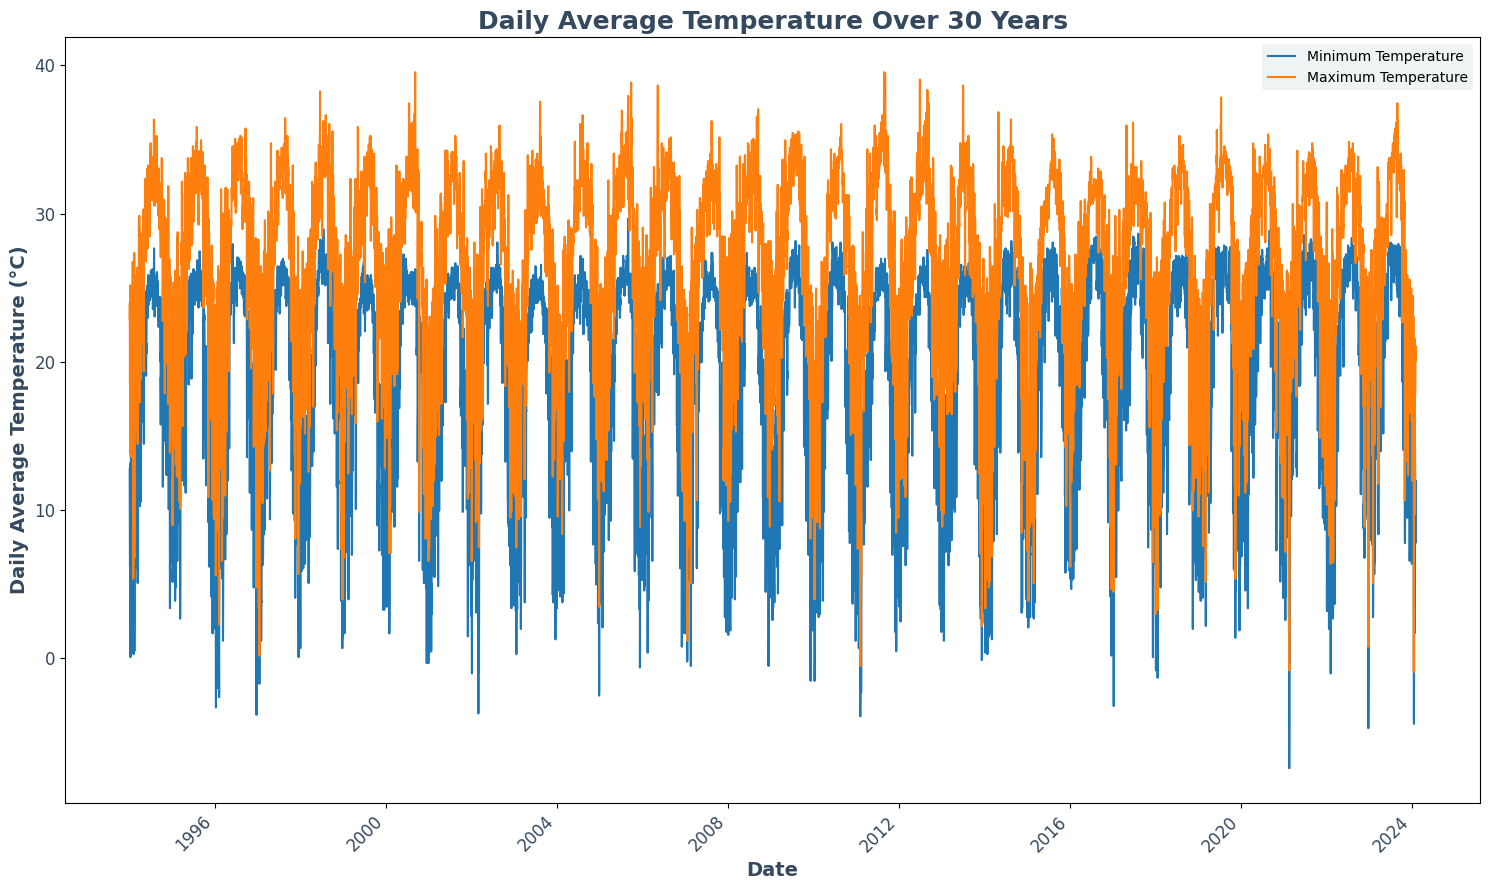

In [8]:
plt.figure(figsize=(15, 9))
plt.plot(temperature_data['date'],temperature_data['tmin'], label="Minimum Temperature")
plt.plot(temperature_data['date'],temperature_data['tmax'], label="Maximum Temperature")

plt.title('Daily Average Temperature Over 30 Years', fontsize=18, fontweight='bold', color='#34495e')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Daily Average Temperature (°C)', fontsize=14, fontweight='bold', color='#34495e')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#34495e')
plt.yticks(fontsize=12, color='#34495e')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.gca().set_axisbelow(True)
plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

legend = plt.legend()
legend.get_frame().set_facecolor('#ecf0f1')
legend.get_frame().set_linewidth(0)

plt.tight_layout()
plt.show()

In [9]:
# Create a new DataFrame to store the monthly statistics
monthly_stats = pd.DataFrame()
monthly_stats['monthly_avg'] = temperature_data.groupby(['year', 'month'])[['tmin', 'tmax']].mean().mean(axis=1)
monthly_stats

monthly_avg
year month             
1994 1        14.659677
     2        15.385714
     3        18.767742
     4        22.185000
     5        25.485484
...                 ...
2023 9        29.311667
     10       24.101613
     11       17.820000
     12       17.159677
2024 1        13.032258

[361 rows x 1 columns]

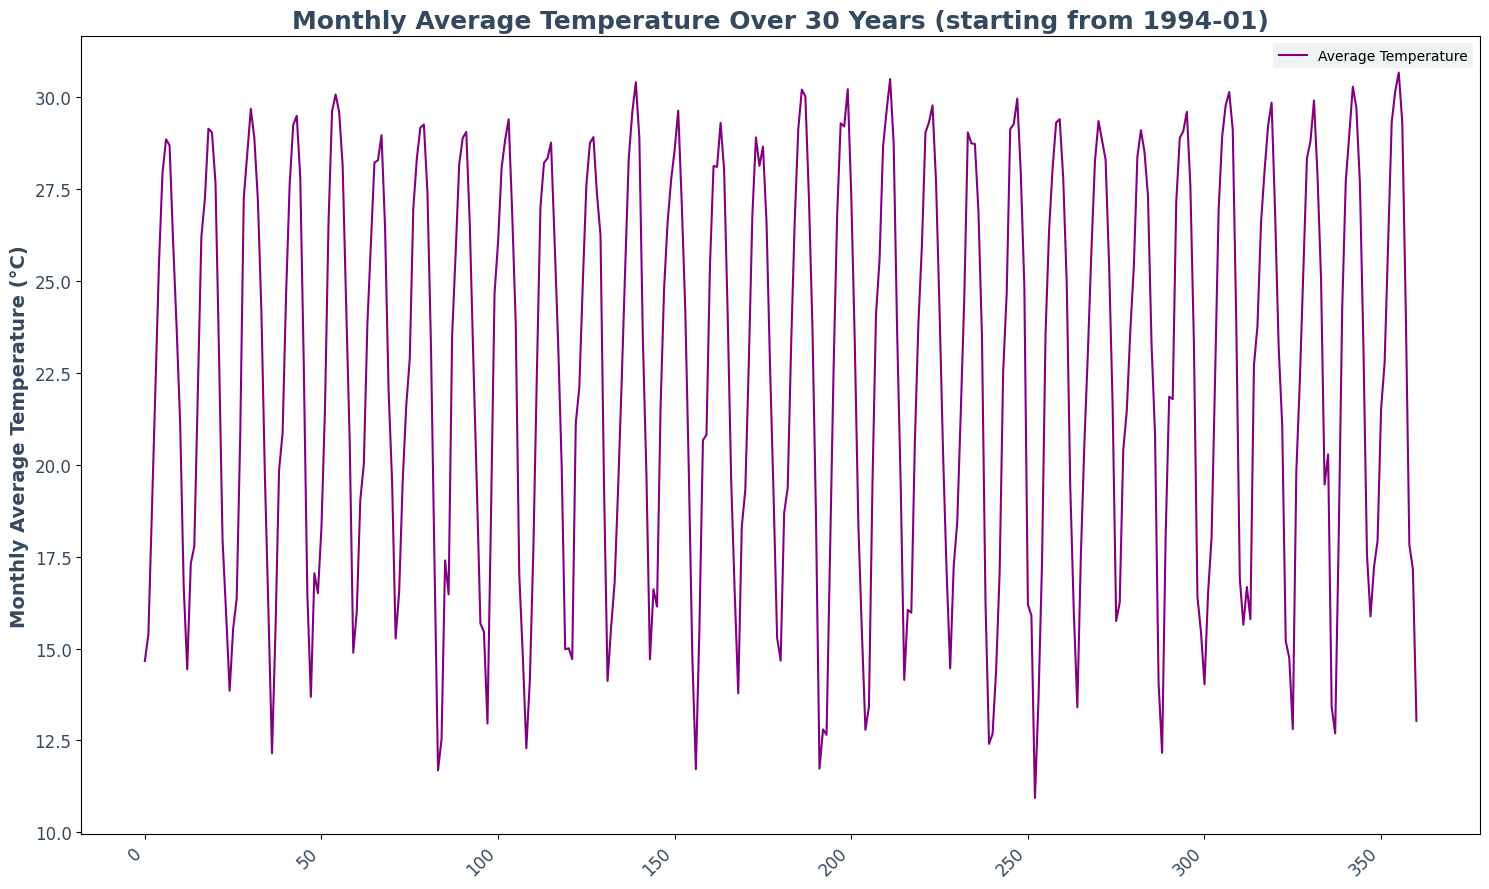

In [10]:
plt.figure(figsize=(15, 9))
plt.plot([_ for _ in range(len(monthly_stats))],monthly_stats['monthly_avg'], label="Average Temperature", color="purple")

plt.title('Monthly Average Temperature Over 30 Years (starting from 1994-01)', fontsize=18, fontweight='bold', color='#34495e')
#plt.xlabel('Month', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Monthly Average Temperature (°C)', fontsize=14, fontweight='bold', color='#34495e')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#34495e')
plt.yticks(fontsize=12, color='#34495e')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.gca().set_axisbelow(True)
plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

legend = plt.legend()
legend.get_frame().set_facecolor('#ecf0f1')
legend.get_frame().set_linewidth(0)

plt.tight_layout()
plt.show()

## Now we compute the variabilities associates with monthly average temperatures in Corpus Christi.

**The variabilities we use are the following:**
<ul>
<li>Range = Min_temperature - Max_temperature</li>
<li>Inter-quartile range = Q3 - Q1 (Third quartile - First quartile)</li>
<li>Standard deviation</li>
<hr>
This helps us to figure out the correlation between monthly average temperature and variabilities

In [11]:
# Compute monthly range
monthly_stats['monthly_range'] = temperature_data.groupby(['year', 'month'])['tmax'].max() - temperature_data.groupby(['year', 'month'])['tmin'].min()
# Compute monthly interquartile range
monthly_stats['monthly_iqr'] = temperature_data.groupby(['year', 'month']).apply(lambda x: x['tmax'].quantile(0.75) - x['tmin'].quantile(0.25))
# Compute monthly standard deviation
monthly_stats['monthly_std_dev'] = temperature_data.groupby(['year', 'month'])[['tmin', 'tmax']].std().mean(axis=1)
monthly_stats.reset_index(inplace=True)

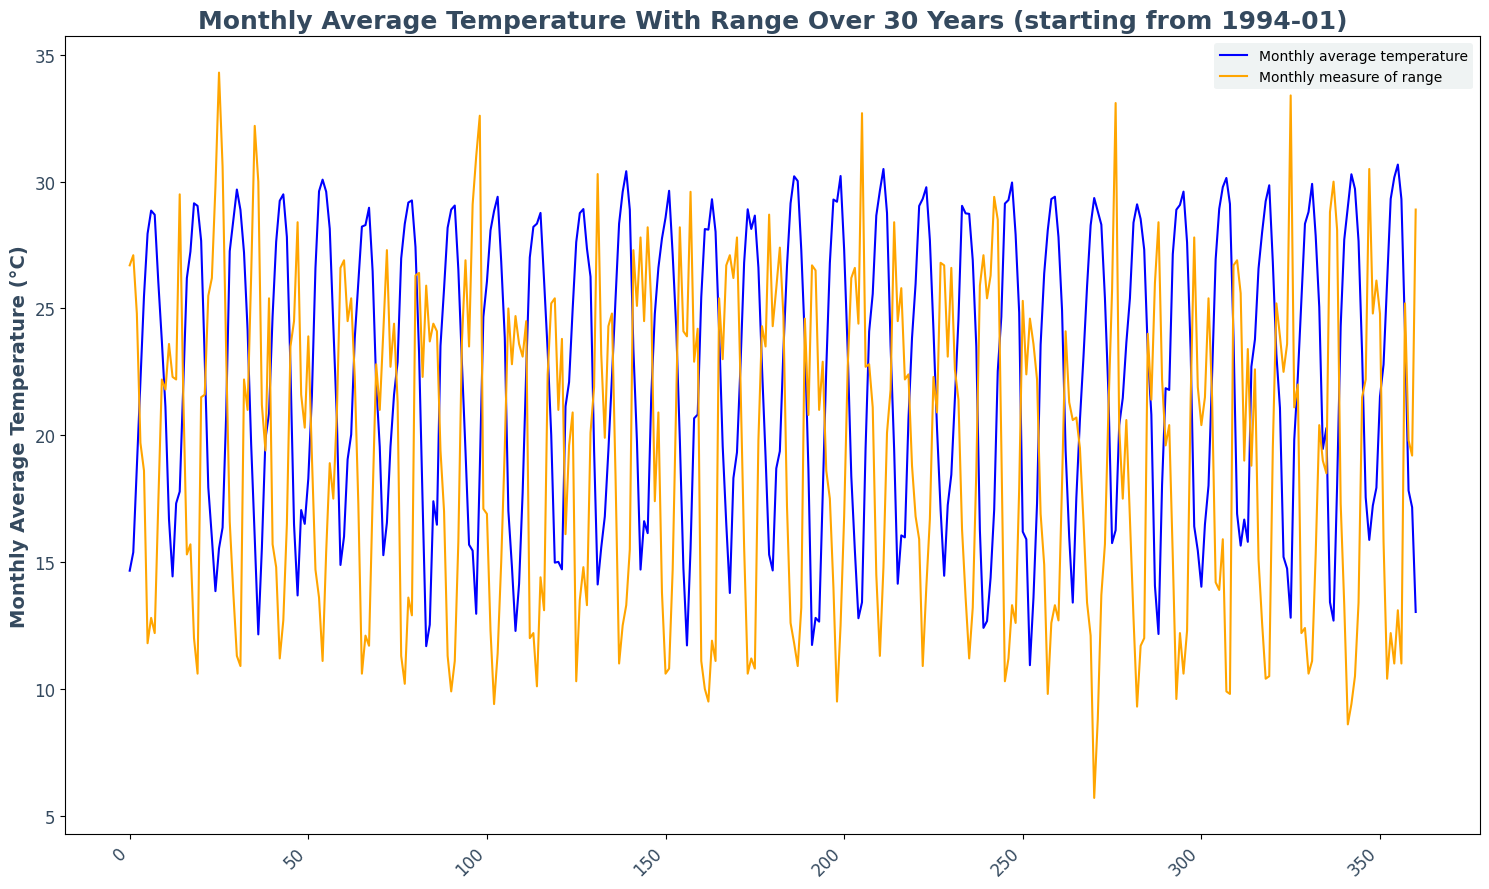

In [12]:
plt.figure(figsize=(15, 9))
plt.plot([i for i in range(len(monthly_stats))], monthly_stats['monthly_avg'], label="Monthly average temperature", color="blue")
plt.plot([i for i in range(len(monthly_stats))], monthly_stats['monthly_range'], label="Monthly measure of range", color="orange")

plt.title('Monthly Average Temperature With Range Over 30 Years (starting from 1994-01)', fontsize=18, fontweight='bold', color='#34495e')
#plt.xlabel('Month', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Monthly Average Temperature (°C)', fontsize=14, fontweight='bold', color='#34495e')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#34495e')
plt.yticks(fontsize=12, color='#34495e')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.gca().set_axisbelow(True)
plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

legend = plt.legend()
legend.get_frame().set_facecolor('#ecf0f1')
legend.get_frame().set_linewidth(0)

plt.tight_layout()
plt.show()

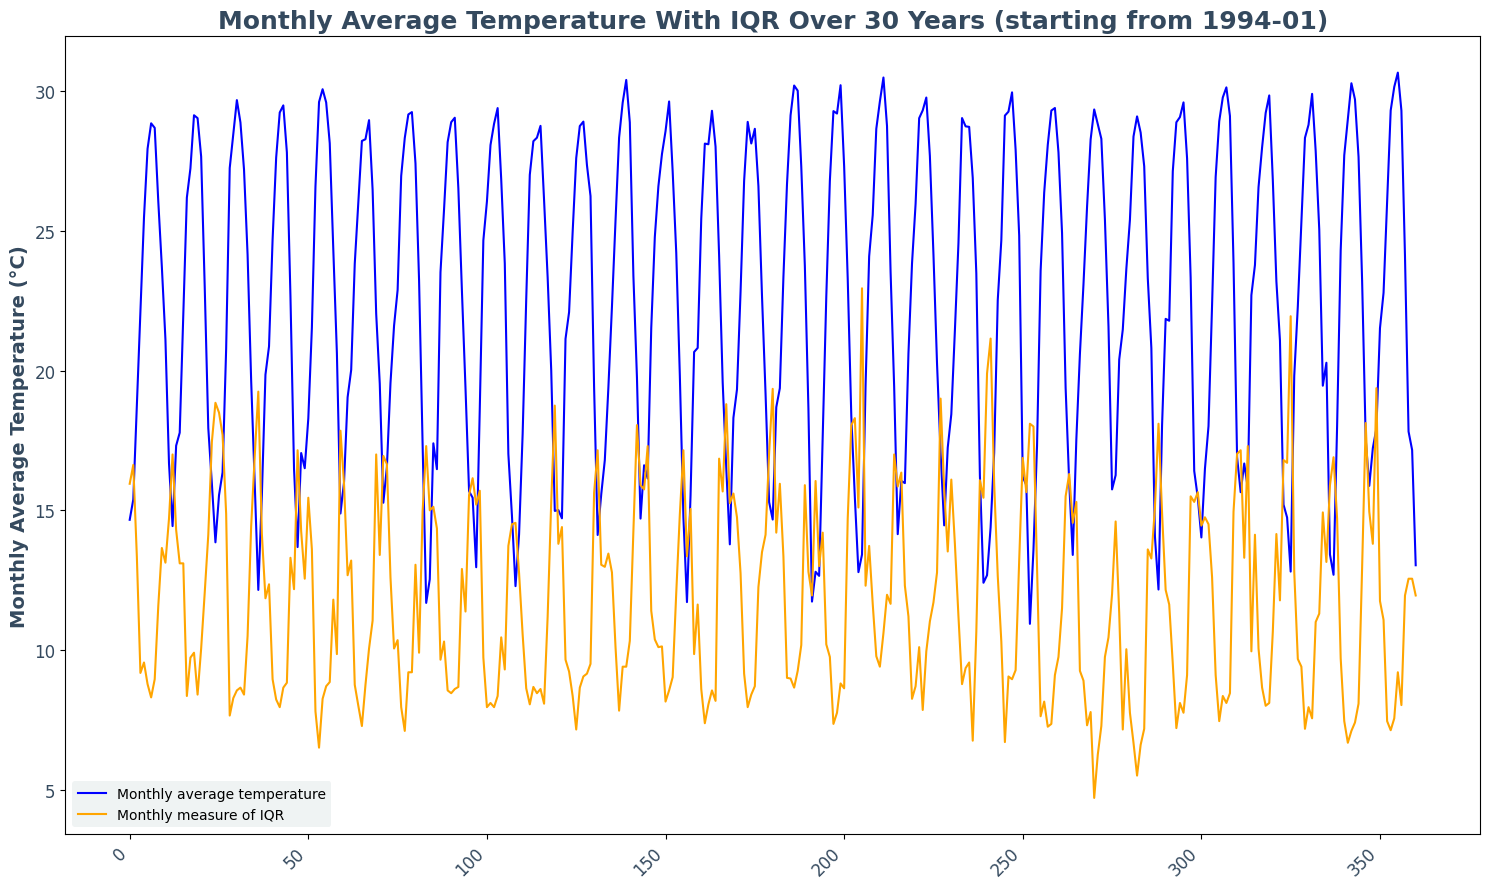

In [13]:

plt.figure(figsize=(15, 9))
plt.plot([i for i in range(len(monthly_stats))], monthly_stats['monthly_avg'], label="Monthly average temperature", color="blue")
plt.plot([i for i in range(len(monthly_stats))], monthly_stats['monthly_iqr'], label="Monthly measure of IQR", color="orange")

plt.title('Monthly Average Temperature With IQR Over 30 Years (starting from 1994-01)', fontsize=18, fontweight='bold', color='#34495e')
#plt.xlabel('Month', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Monthly Average Temperature (°C)', fontsize=14, fontweight='bold', color='#34495e')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#34495e')
plt.yticks(fontsize=12, color='#34495e')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.gca().set_axisbelow(True)
plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

legend = plt.legend()
legend.get_frame().set_facecolor('#ecf0f1')
legend.get_frame().set_linewidth(0)

plt.tight_layout()
plt.show()

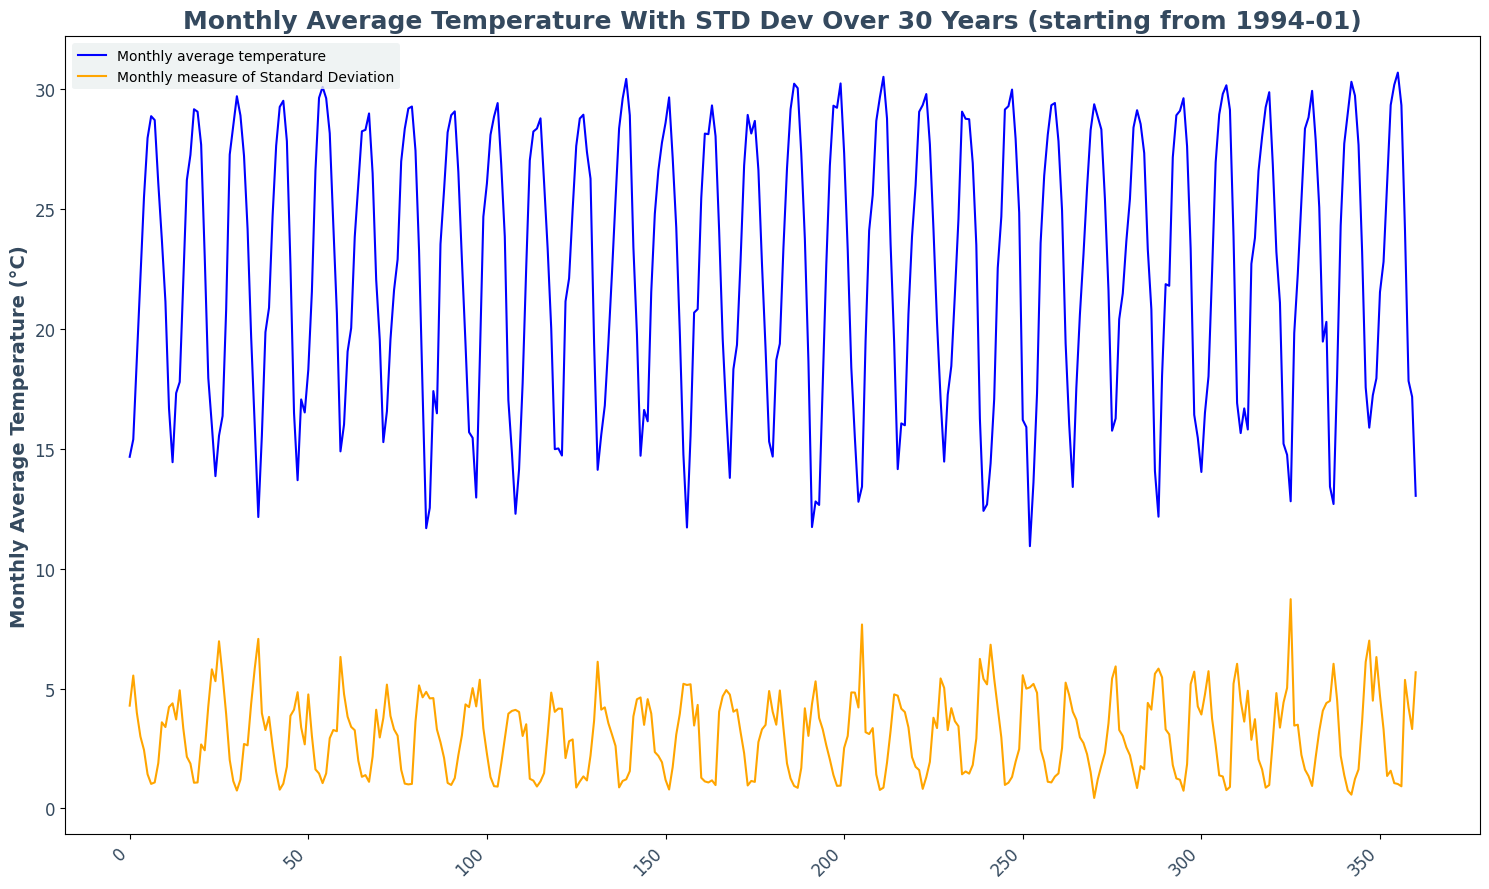

In [14]:

plt.figure(figsize=(15, 9))
plt.plot([i for i in range(len(monthly_stats))], monthly_stats['monthly_avg'], label="Monthly average temperature", color="blue")
plt.plot([i for i in range(len(monthly_stats))], monthly_stats['monthly_std_dev'], label="Monthly measure of Standard Deviation", color="orange")

plt.title('Monthly Average Temperature With STD Dev Over 30 Years (starting from 1994-01)', fontsize=18, fontweight='bold', color='#34495e')
#plt.xlabel('Month', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Monthly Average Temperature (°C)', fontsize=14, fontweight='bold', color='#34495e')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#34495e')
plt.yticks(fontsize=12, color='#34495e')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.gca().set_axisbelow(True)
plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

legend = plt.legend()
legend.get_frame().set_facecolor('#ecf0f1')
legend.get_frame().set_linewidth(0)

plt.tight_layout()
plt.show()

## Now we compute Pearson's correlation coefficients for monthly average temperature with every measure of variability

In [15]:
pearsons_corr_coefficient_with_range = monthly_stats['monthly_avg'].corr(monthly_stats['monthly_range'])
print(pearsons_corr_coefficient_with_range)

-0.8483718938009057


In [17]:
pearsons_corr_coefficient_with_iqr = monthly_stats['monthly_avg'].corr(monthly_stats['monthly_iqr'])
pearsons_corr_coefficient_with_iqr

-0.8525907862783091

In [ ]:
pearsons_corr_coefficient_with_std_dev = monthly_stats['monthly_avg'].corr(monthly_stats['monthly_std_dev'])
pearsons_corr_coefficient_with_std_dev

-0.8875995082524168

Plot monthly details

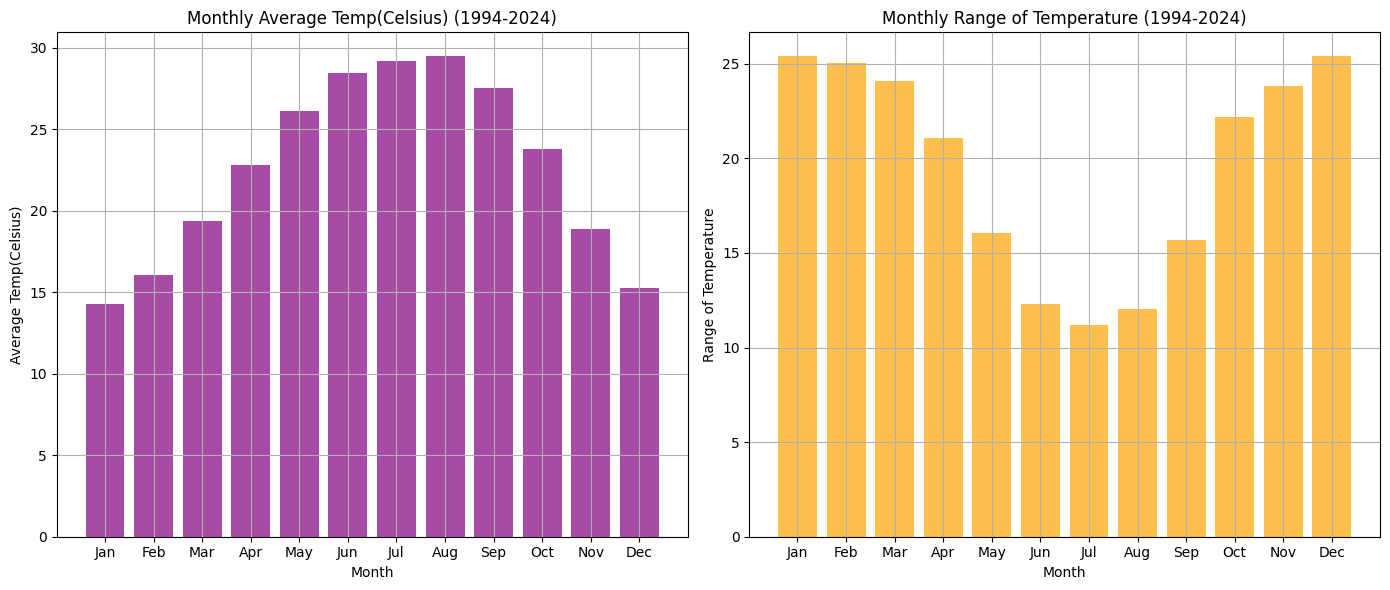

In [18]:
# Calculate monthly means for tmmn and tmmx
monthly_avg = monthly_stats.groupby('month')['monthly_avg'].mean()
monthly_range = monthly_stats.groupby('month')['monthly_range'].mean()

# Plot histograms for tmmn and tmmx
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(monthly_avg.index, monthly_avg, color='purple', alpha=0.7)
plt.title('Monthly Average Temp(Celsius) (1994-2024)')
plt.xlabel('Month')
plt.ylabel('Average Temp(Celsius)')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(monthly_range.index, monthly_range, color='orange', alpha=0.7)
plt.title('Monthly Range of Temperature (1994-2024)')
plt.xlabel('Month')
plt.ylabel('Range of Temperature')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.tight_layout()
plt.show()


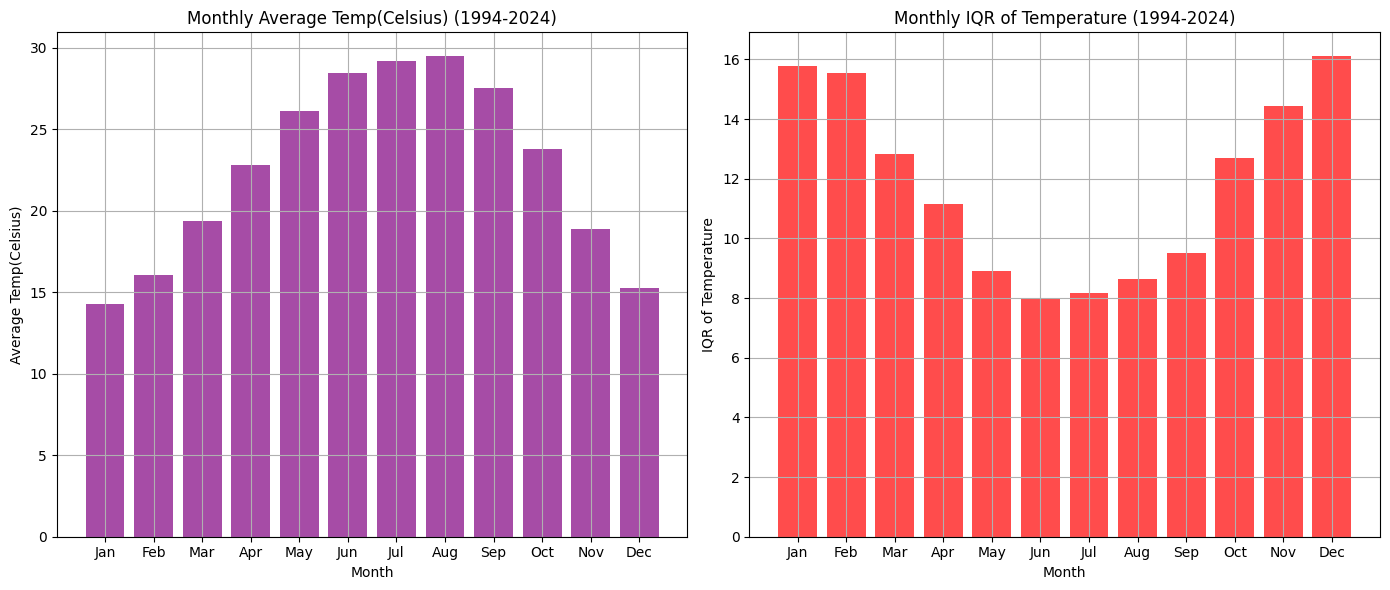

In [19]:
# Calculate monthly means for tmmn and tmmx
monthly_avg = monthly_stats.groupby('month')['monthly_avg'].mean()
monthly_iqr = monthly_stats.groupby('month')['monthly_iqr'].mean()

# Plot histograms for tmmn and tmmx
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(monthly_avg.index, monthly_avg, color='purple', alpha=0.7)
plt.title('Monthly Average Temp(Celsius) (1994-2024)')
plt.xlabel('Month')
plt.ylabel('Average Temp(Celsius)')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(monthly_iqr.index, monthly_iqr, color='red', alpha=0.7)
plt.title('Monthly IQR of Temperature (1994-2024)')
plt.xlabel('Month')
plt.ylabel('IQR of Temperature')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.tight_layout()
plt.show()


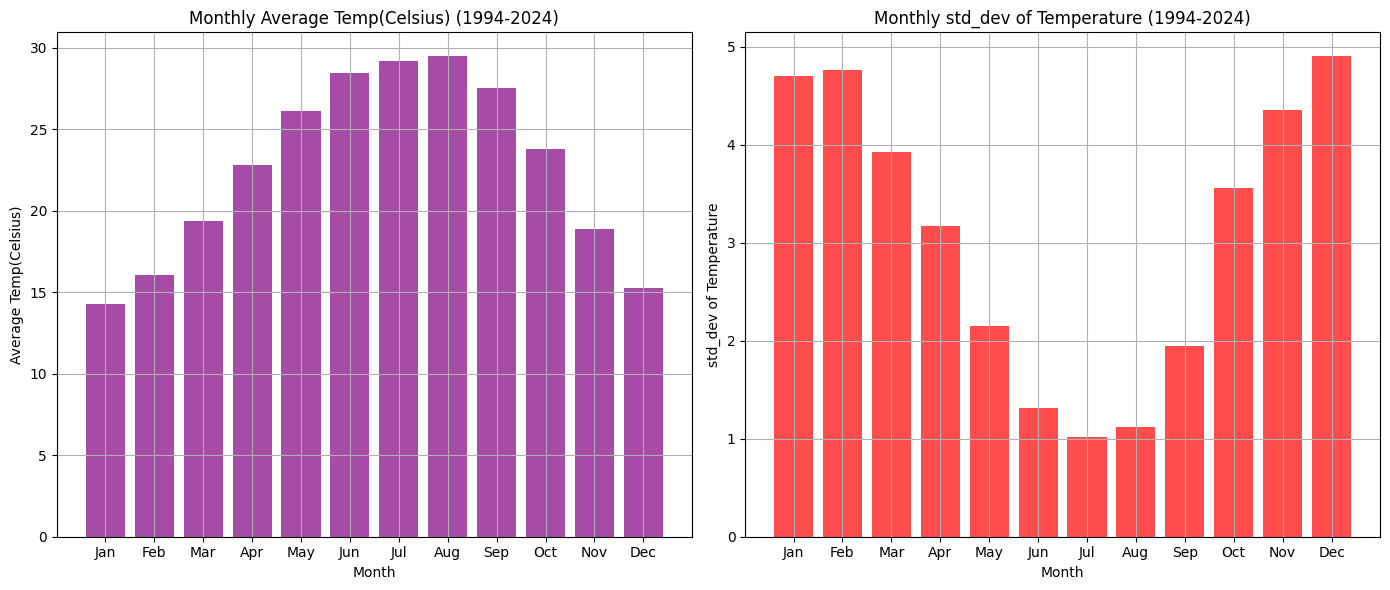

In [20]:
# Calculate monthly means for tmmn and tmmx
monthly_avg = monthly_stats.groupby('month')['monthly_avg'].mean()
monthly_std_dev = monthly_stats.groupby('month')['monthly_std_dev'].mean()

# Plot histograms for tmmn and tmmx
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(monthly_avg.index, monthly_avg, color='purple', alpha=0.7)
plt.title('Monthly Average Temp(Celsius) (1994-2024)')
plt.xlabel('Month')
plt.ylabel('Average Temp(Celsius)')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(monthly_std_dev.index, monthly_std_dev, color='red', alpha=0.7)
plt.title('Monthly std_dev of Temperature (1994-2024)')
plt.xlabel('Month')
plt.ylabel('std_dev of Temperature')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.tight_layout()
plt.show()


We perform the Paired t-test for average temperature with range, iqr and std_dev respectively

In [21]:
from scipy.stats import ttest_rel

# Perform paired t-test
t_statistic, p_value = ttest_rel(monthly_avg, monthly_range)

# Print the results
print(f'Paired t-test Results:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Average Temperature and Range.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Average Temperature and Range.")


Paired t-test Results:
T-statistic: 0.9542576353066157
P-value: 0.36045342901605304
Fail to reject the null hypothesis: There is no significant difference between Average Temperature and Range.


In [22]:
from scipy.stats import ttest_rel

# Perform paired t-test
t_statistic, p_value = ttest_rel(monthly_avg, monthly_iqr)

# Print the results
print(f'Paired t-test Results:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Average Temperature and IQR.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Average Temperature and IQR.")


Paired t-test Results:
T-statistic: 4.267729590885698
P-value: 0.0013257073100136048
Reject the null hypothesis: There is a significant difference between Average Temperature and IQR.


In [23]:
from scipy.stats import ttest_rel

# Perform paired t-test
t_statistic, p_value = ttest_rel(monthly_avg, monthly_std_dev)

# Print the results
print(f'Paired t-test Results:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Average Temperature and Standard Deviation.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Average Temperature and Standard Deviation.")


Paired t-test Results:
T-statistic: 9.48506708625271
P-value: 1.2505848037691707e-06
Reject the null hypothesis: There is a significant difference between Average Temperature and Standard Deviation.


Paired t-test Result: The paired t-test results indicate no significant difference between 'average temperature' and 'range', but a significant difference between 'average temperature' and 'iqr', and between 'Average Temperature' and 'std_dev'.

T-statistic: The t-statistic is a measure of how many standard deviations the means of two groups are apart. They are computed above in the last three sections.

In [24]:
monthly_avg = np.array(monthly_avg)
monthly_std_dev = np.array(monthly_std_dev)
monthly_iqr = np.array(monthly_iqr)
monthly_range = np.array(monthly_range)

In [25]:
from statsmodels.tsa.stattools import grangercausalitytests

data = np.column_stack((monthly_avg, monthly_std_dev))

max_lag = 1  # Maximum lag to consider
test_result = grangercausalitytests(data, max_lag, verbose=True)

# Print the test results
for lag in range(1, max_lag + 1):
    print(f"Granger Causality Test (lag={lag}):")
    print(test_result[lag])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9500  , p=0.0821  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=5.4313  , p=0.0198  , df=1
likelihood ratio test: chi2=4.4142  , p=0.0356  , df=1
parameter F test:         F=3.9500  , p=0.0821  , df_denom=8, df_num=1
Granger Causality Test (lag=1):
({'ssr_ftest': (3.9500000294928386, 0.08209513414149472, 8.0, 1), 'ssr_chi2test': (5.431250040552653, 0.019779515870903524, 1), 'lrtest': (4.414187130822739, 0.0356412559869285, 1), 'params_ftest': (3.9500000294928843, 0.08209513414149326, 8.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7a4b68120b20>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7a4b658e6a40>, array([[0., 1., 0.]])])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [26]:
from scipy.stats import spearmanr, kendalltau, pointbiserialr


# Spearman Rank Correlation
spearman_corr, spearman_p_value = spearmanr(monthly_avg, monthly_std_dev)
print("Spearman Rank Correlation:", spearman_corr)
print("p-value:", spearman_p_value)

# Kendall's Tau
kendall_tau_corr, kendall_tau_p_value = kendalltau(monthly_avg, monthly_std_dev)
print("Kendall's Tau:", kendall_tau_corr)
print("p-value:", kendall_tau_p_value)

# Point-Biserial Correlation
# Let's assume list1 is the binary variable and list2 is the continuous variable
point_biserial_corr, point_biserial_p_value = pointbiserialr(monthly_avg, monthly_std_dev)
print("Point-Biserial Correlation:", point_biserial_corr)
print("p-value:", point_biserial_p_value)

Spearman Rank Correlation: -0.965034965034965
p-value: 3.88098529962746e-07
Kendall's Tau: -0.8787878787878787
p-value: 5.319397680508792e-06
Point-Biserial Correlation: -0.9740480521648636
p-value: 8.876102800003976e-08


In [27]:
# Spearman Rank Correlation
spearman_corr, spearman_p_value = spearmanr(monthly_avg, monthly_iqr)
print("Spearman Rank Correlation:", spearman_corr)
print("p-value:", spearman_p_value)

# Kendall's Tau
kendall_tau_corr, kendall_tau_p_value = kendalltau(monthly_avg, monthly_iqr)
print("Kendall's Tau:", kendall_tau_corr)
print("p-value:", kendall_tau_p_value)

# Point-Biserial Correlation
# Let's assume list1 is the binary variable and list2 is the continuous variable
point_biserial_corr, point_biserial_p_value = pointbiserialr(monthly_avg, monthly_iqr)
print("Point-Biserial Correlation:", point_biserial_corr)
print("p-value:", point_biserial_p_value)

Spearman Rank Correlation: -0.9510489510489512
p-value: 2.0384246324655723e-06
Kendall's Tau: -0.8181818181818181
p-value: 4.4129288920955584e-05
Point-Biserial Correlation: -0.9725699232876036
p-value: 1.167956735628763e-07


In [28]:
# Spearman Rank Correlation
spearman_corr, spearman_p_value = spearmanr(monthly_avg, monthly_range)
print("Spearman Rank Correlation:", spearman_corr)
print("p-value:", spearman_p_value)

# Kendall's Tau
kendall_tau_corr, kendall_tau_p_value = kendalltau(monthly_avg, monthly_range)
print("Kendall's Tau:", kendall_tau_corr)
print("p-value:", kendall_tau_p_value)

# Point-Biserial Correlation
# Let's assume list1 is the binary variable and list2 is the continuous variable
point_biserial_corr, point_biserial_p_value = pointbiserialr(monthly_avg, monthly_range)
print("Point-Biserial Correlation:", point_biserial_corr)
print("p-value:", point_biserial_p_value)

Spearman Rank Correlation: -0.9790209790209792
p-value: 3.0898013985487064e-08
Kendall's Tau: -0.909090909090909
p-value: 1.4655483405483405e-06
Point-Biserial Correlation: -0.9498181996210318
p-value: 2.303073988736794e-06
